# <span style="color:#900C3F"> Laboratorio di Simulazione Numerica</span>

# <span style="color: #C70039 "> Esercitazione 2</span>

### <span style="color: #FF5733 "> Esercizio 02.1</span>

L'esercizio chiede di calcolare l'integrale monodimensionale $I = \int_0^1 \frac{\pi}{2}\cos(\pi x/2) dx = 1$ usando una tecnica Monte Carlo, prima campionando una distriuzione uniforme tra 0 e 1, poi usando il metodo dell' importance sampling e mostrare un grafico con le stime di $I$ e la loro incertezza in funzione del numero di step Monte Carlo.  
 
Nell'importance sampling si sceglie di riscrivere l'integrale $\int g(x)p(x)dx$ inserendo una nuova distribuzione di probabilità $d(x)$ nel seguente modo:  
$$\int\frac{g(x)p(x)}{d(x)}d(x)dx$$  
Si dimostra poi che scegliendo una distribuzione di probabilità $d(x)$ il più possibile simile all'integranda iniziale $g(x)p(x)$ si minimizza l'errore nella stima dell'integrale.  
In questo caso non si può scegliere come $d(x)$ lo sviluppo di Taylor dell'integranda, in quanto questo non è positivo in $[0,1]$ (lo è solo fino a $\frac{2}{\pi}$) e non può quindi rappresentare una distribuzioe di probabilità in questo intervallo.  
Ho scelto quindi di approssimare l'integranda tra 0 e 1 con la retta $y=-\frac{\pi}{2}x+\frac{\pi}{2}$. Questa si può normalizzare tra 0 e 1 come $p(x)=-2x+2$. La cumulativa di questa distribuzione è $F(x)=-2x^2+2$ e cacolando l'inversa della cumulativa si ottiene: $x=1\pm\sqrt{1-y}$, dove scelgo il segno meno in modo che questa funzione appartenga all'intervallo $[0,1]$.  
 

Si riportano di seguito i risultati ottenuti, facendo 100000 step Monte Carlo, divisi in 100 blocchi:

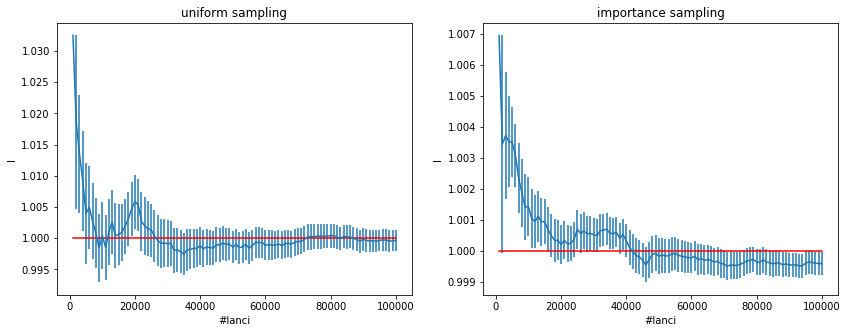

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
x, f, error = np.loadtxt("es02.1/integraleunif.dat", usecols=(0,1,2), delimiter=',', unpack='true')
plt.errorbar(x,f,yerr=error)
g=np.full(x.size, 1)
plt.plot(x,g,c="red")
plt.xlabel('#lanci')
plt.ylabel('I')
plt.title('uniform sampling')

plt.subplot(1,2,2)
x, f, error = np.loadtxt("es02.1/integraleimp.dat", usecols=(0,1,2), delimiter=',', unpack='true')
plt.errorbar(x,f,yerr=error)
g=np.full(x.size, 1)
plt.plot(x,g,c="red")
plt.xlabel('#lanci')
plt.ylabel('I')
plt.title('importance sampling')


plt.show()


### <span style="color: #FF5733 "> Esercizio 02.2</span>

Ho simulato un random walk discreto in 3D, su di un reticolo di lato 1: ad ogni step del walk si compie un passo (di lunghezza pari all'unità) lungo una delle tre direzioni x,y,z, in avanti o all'indietro. Ad ogni passo ho estartto in modo uniforme uno dei tre assi lungo il quale muovermi e ho scelto (sempre estraendo da una distribuzione uniforme) se muovermi in avanti o all'indietro.
Ho poi simualto un random walk continuo in 3D: ad ogni step genero in modo uniforme un punto sulla sfera di raggio 1 centrata sulla posizione attuale (ad ogni step si genera quindi un angolo $\theta \in [0,\pi]$ e un angolo $\phi \in [0,2\pi]$) e mi sposto nel punto così selezionato.  

Per entrambi i modi (discreto e continuo) ho simulato random walk da 100 step $10^4$ volte e ho rappresentato in un grafico la quantità $\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$, che rappresenta la distanza dall'origine a cui si arriva durante il walk, in funzione dello step. Ho usato il metodo della media a blocchi e ho scelto di usare 100 blocchi.

Osseravazione sul codice: il codice che ho scritto per svolgere l'esercizio ha il difetto di usare male la memoria (salvo dei dati che potrei evitare di salvare, in particolare salvo il valore di $r^2$ per ogni blocco e non sfrutto la potenzialità del metodo dei blocchi di stimare la grandezza di interesse e l suo errore "on the fly"), ma questo mi ha permesso di scrivere un codice più semplice e lineare.  

Per capire se i risultati che hobtrovato indicano un comportamento diffusivo, ho considerato il random walk nel continuo e ne ho simulato ulteriori 10000 realizzazioni con 10000 passi ciasucna; ho poi realizzato un istogramma che rappresenta le posizioni finali lungo l'asse x (guardo solo una direzione) a cui arrivano le diverse realizzazioni del random walk e ho trovato un andamento gaussiano.  
Il fatto che la posizione vada come $\sqrt t$ (posso infatti associare ai passi lo scorrere del tempo: ogni volta che si compie un passo il tempo va avanti di una unità) e il fatto che io abbia trovato una distribuzione gaussiana (una distribuzione a delta di Dirac -sono partita da una posizione fissata- evolve in una gaussiana, con centro nel centro della distribuzione di partenza) sono indizi del fatto che il random walk che ho simulato presenta comportamento diffusivo.


58.00528345816754


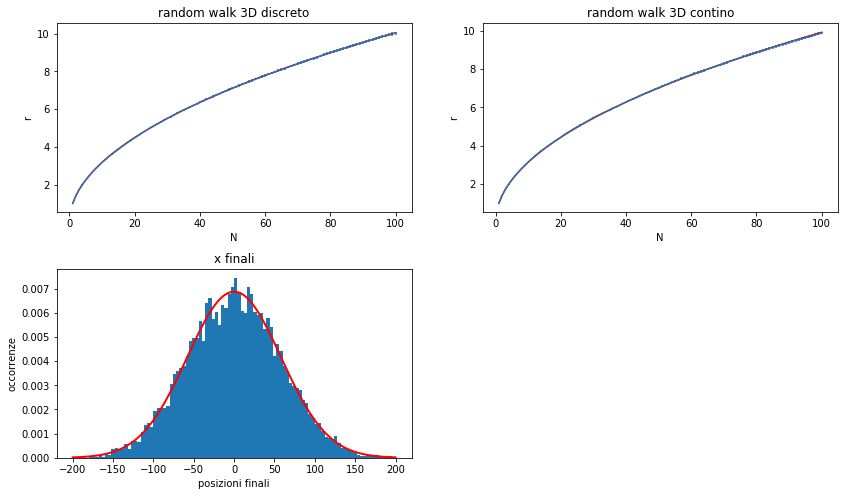

In [3]:
from scipy.stats import norm
import scipy as sp
import matplotlib.mlab as mlab
from scipy.optimize import curve_fit
def g(x,a):  # defining the fitting function
    return a * x**0.5

plt.figure(figsize=(14,8))
plt.subplots_adjust( hspace=0.3 )

plt.subplot(2,2,1)
x, f, error = np.loadtxt("es02.2/randomwalk.dat", usecols=(0,1,2), delimiter=',', unpack='true')
plt.errorbar(x,f,yerr=error)
plt.xlabel('N')
plt.ylabel('r')
plt.title('random walk 3D discreto')
p_opt, p_cov = curve_fit(g,x,f)    
y_fit =g(x,p_opt[0])
plt.plot(x,y_fit,label='fit', c='red') # plotting fitted function

plt.subplot(2,2,2)
x, f, error = np.loadtxt("es02.2/randomwalk2.dat", usecols=(0,1,2), delimiter=',', unpack='true')
plt.errorbar(x,f,yerr=error)
plt.xlabel('N')
plt.ylabel('r')
plt.title('random walk 3D contino')
p_opt, p_cov = curve_fit(g,x,f)    
y_fit =g(x,p_opt[0])
plt.plot(x,y_fit,label='fit', c='red') # plotting fitted function

plt.subplot(2,2,3)
p=np.loadtxt("es02.2/posfinal.dat", usecols=0)
n_bins = 100
n, bins, patches = plt.hist(p, n_bins, range=(-200,200), density = True)
(mu, sigma) = norm.fit(p)

print(sigma)

y = sp.stats.norm.pdf( bins, mu, sigma)
l = plt.plot(bins, y, 'r', linewidth=2)

plt.xlabel('posizioni finali')
plt.ylabel('occorrenze')
plt.title('x finali')


plt.show()
